In [1]:
import mlgrad.mlocation_scatter as mls
import mlgrad.avragg as avragg
import mlgrad.distance as distance
import mlgrad.func as func

from mlgrad import erm_fg, erm_sg, erm_irgd, fg, fg_rud, sg, weights, averager_it, erisk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import rcsetup
plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

# rcsetup.defaultParams['font.size'][0] = 12
# rcsetup.defaultParams
# plt.style.available

In [2]:
import pyreadr

In [3]:
rdata = pyreadr.pyreadr.read_r('data/dposs.rdata')

LibrdataError: The file is compressed using an unsupported compression scheme

In [2]:
names = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 
         'p8', 'p9', 'p10', 'p11', 'p12', 'p13']
df = pd.read_csv('data/wine.data', names=['cls'] + names)
print(len(df))

178


In [3]:
df3 = df[df['cls'] == 3]
X = np.c_[tuple(df3[n].values for n in names)]

In [4]:
avg = avragg.MWAverage(averager_it(func.QuantileFunc(0.80, func.Sqrt(1.0))))
mlse = mls.MLocationScatterEstimator(avg, n_iter=7, h=0.01)
mlse.fit(X)

[5.0033797490649965, 4.92677825906386, 4.9268005371615216, 4.926876135528364, 4.926997636075401, 4.927159996926194, 4.926909909082802]


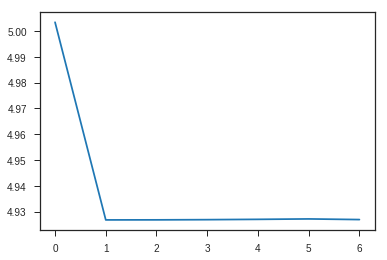

In [5]:
print(mlse.dvals)
plt.plot(mlse.dvals)
plt.show()

In [6]:
loc, sc = mlse.loc, mlse.S
distfunc = mlse.distfunc

In [7]:
# print(loc.base)
# print(mlse.S.base)
# print(mlse.K)

In [8]:
# plt.figure(figsize=(5.0, 4.0))
# plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.)
# plt.scatter([loc[0]], [loc[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='o', label='robust')
# plt.scatter([loc0[0]], [loc0[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='s', label='standard')
# plt.minorticks_on()
# plt.grid(1)
# plt.legend()
# plt.show()

In [9]:
loc, S = mlse.loc.base, mlse.S.base
distfunc = mlse.distfunc

loc0 = mls.standard_location(X)
S0 = mls.standard_covariance(X, loc0)
mls.scale_matrix(S0)
print(loc0)
print(loc)

[1.31537500e+01 3.33375000e+00 2.43708333e+00 2.14166667e+01
 9.93125000e+01 1.67875000e+00 7.81458333e-01 4.47500000e-01
 1.15354167e+00 7.39624998e+00 6.82708333e-01 1.68354167e+00
 6.29895833e+02]
[1.31582100e+01 3.30656758e+00 2.45397905e+00 2.14486093e+01
 9.83972455e+01 1.70687272e+00 8.02731162e-01 4.54861357e-01
 1.16175814e+00 7.44319341e+00 6.95833908e-01 1.67854922e+00
 6.10672358e+02]


In [10]:
distfunc = distance.MahalanobisDistance(np.linalg.inv(S))
distfunc0 = distance.MahalanobisDistance(np.linalg.inv(S0))

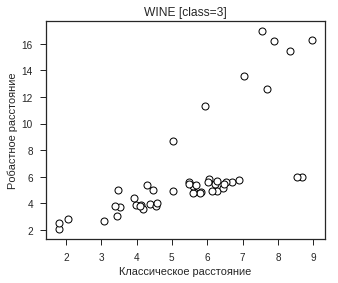

In [11]:
plt.figure(figsize=(5.0, 4.0))
D0 = [distfunc0(x, loc0) for x in X]
D = [distfunc(x, loc) for x in X]
plt.scatter(D0, D, c='w', edgecolor='k', linewidth=1)
plt.xlabel('Классическое расстояние')
plt.ylabel('Робастное расстояние')
plt.title('WINE [class=3]')
plt.savefig('fig/robust_clustering_elipse_wine_3.eps')
plt.show()